<a href="https://colab.research.google.com/github/RiddhiS01/Statistical-Analysis-/blob/main/Wholesale_seller_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wholesale Customers Analysis**

**Introduction**

A wholesale distributor operating in different regions of Portugal has information on the annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products (Fresh, Milk, Grocery, Frozen, Detergents Paper, Delicatessen) in 3 different regions (Lisbon, Oporto, Other) and across 2 different sales channels (Hotel, Retail).

**Problem Statement**

The wholesale distributor seeks to gain insights into their business operations through the analysis of annual spending data across different regions and channels. They aim to identify patterns, trends, and potential areas for improvement to enhance overall business performance.
Goals of the Project
1.	Descriptive Statistics: Summarize the data using descriptive statistics to provide an overview of spending patterns across regions and channels.
2.	Identifying spending patterns: Determine which region and channel spend the most and the least annually to understand customer behaviour and preferences.
3.	Analysing product categories: Describe and analyse the spending on the six different varieties of items across regions and channels to identify any trends or patterns. Assess the variability of spending on different items to identify the most and least inconsistent behaviours among the product categories.
4.	Outlier Detection: Determine if there are any outliers in the data that may require further investigation.
5.	Recommendations for Business: Based on the analysis, provide actionable recommendations to the wholesale distributor to optimize their operations, enhance customer satisfaction, and improve profitability.
By addressing these goals, the wholesale distributor can gain valuable insights into their business operations and make informed decisions to drive growth and success. We are asked certain questions about the dataset that we will answer one by one in our report.




In [1]:
## Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the csv in which data is stored using pandas 'read_csv' and store it in a variable 'df'
## This code will create the data set into a Data Frame

df = pd.read_csv("/content/Wholesale+Customers+Data.csv")

In [3]:
## To view the dataset
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


Description of Columns and their data types:

•	There is total 9 Columns and 440 rows in the data.

•	Buyer/Spender:

o	This may refer to the unique customers who purchase these products

o	Numeric data type (int64)

•	There are 6 product columns:

o	Fresh, Milk, Grocery, Frozen, Detergents Paper, Delicatessen

o	All in Numeric (int64) data type

•	Channel:

o	 The medium through which these are sold (Hotel, Retail)

o	Object or string data type

•	Region:

o	The regions where the items are sold (Oporto, Lisbon, Other)

o	Object or string data type

There were no null values in any rows of the data


In [4]:
## To view the total number of rows and columns in the dataset
print("Total number of rows and columns are (rows,columns):",df.shape)

Total number of rows and columns are (rows,columns): (440, 9)


In [5]:
## To view details about the columns and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


### **Data Cleaning and preprocessing**

Data cleaning is done to remove any missing values, duplicated rows and any errors from the data. Upon preliminary analysis of the data, we found this dataset had no missing values and duplicated rows. However, we found that the column ‘Buyer/Spender’ is a column with unique IDs of customers and can be mistaken for a numeric column when working on this data, hence, we changed its data type to ‘String’ so that it is not included in numeric calculations.


In [6]:
## Identifying any duplicated rows
df[df.duplicated()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [7]:
## Converting unique retailors ('Buyer/Spender') number to string so it is not mistaken as a numeric column
df['Buyer/Spender']=df['Buyer/Spender'].astype('str')

### **Descriptive statistics to summarize data.**

In [8]:
## Descriptive statistics of all the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


**Descriptive statistics**, such as measures of central tendency (mean, median, mode) and measures of dispersion (range, standard deviation) are used in analysing the data.

•	Count: Total number of observations in the column. 440

•	Mean: Average of the observations, for example, on an average, expenditure on Fresh items was 12000 approximately.

•	Std: Standard Deviation, on an average how much an individual observation deviated from the mean, a larger standard deviation means greater variability or dispersion in that variable.

•	Min: Minimum value recorded in the column.

•	25%: 25th percentile or the first quartile, shows that 25% values are below that value.

•	50%: Also, the median of the distribution, this value divides the data into two halves, 50% values lie below and above it.

•	75%: 75th percentile or the third quartile, 75 % of the data lies below this value.

•	Max: The maximum recorded value in the column.

**Inferences drawn from above statistics:**

o	Maximum average expenditure and standard deviation of a product was for Fresh items. Since, fresh items may include perishables and necessities and include many items that makes average expenditure so high and high deviations indicate diverse purchasing patterns amongst customers.

o	Minimum average expenditure and standard deviation of a product was for Delicatessen items. This category includes specialty or gourmet food items, which may be purchased less frequently but with higher unit prices.

o	All items are skewed towards right or is positively skewed indicating higher mean than median, mean is responsive to outliers. This indicates majority of the data is concentrated to the left, meaning, more inexpensive items are bought by a lot of people and graph shows decreasing trend when we move to higher cost markers on the x-axis.


### **Visualizations**

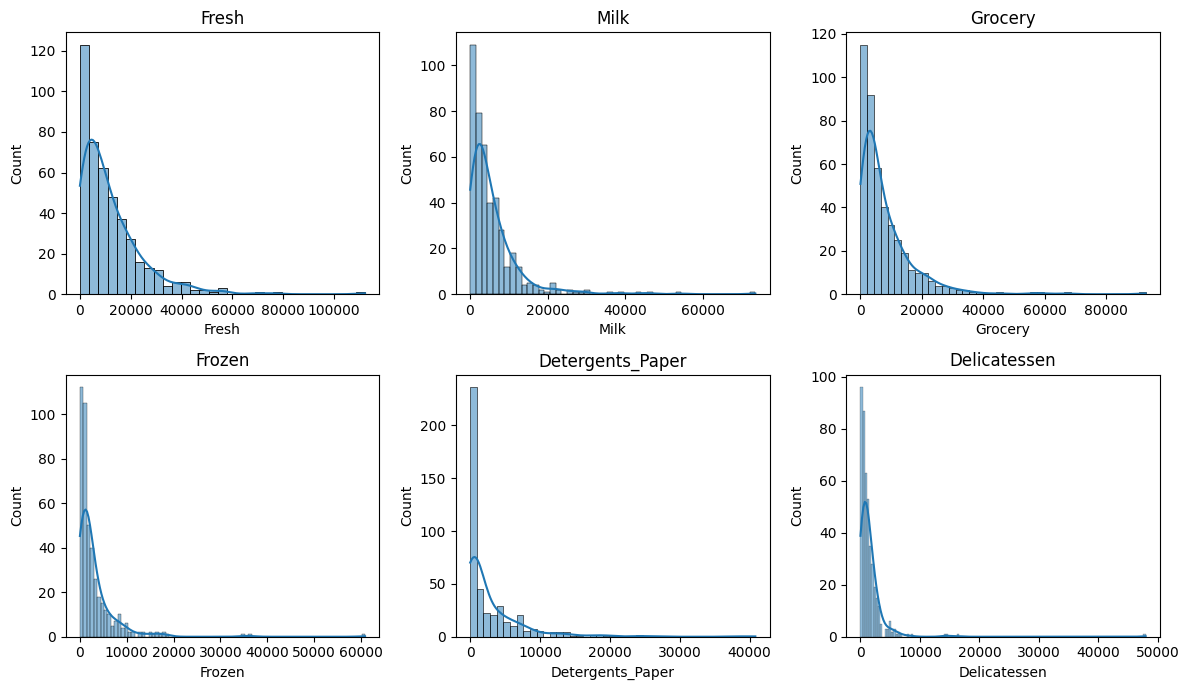

In [9]:
## Visualizing all the product categories using histograms
fig,axs = plt.subplots(2,3,figsize = (12,7))

## Subplots for all items' histograms
sns.histplot(df['Fresh'],kde = True, ax = axs[0][0])
axs[0][0].set_title('Fresh')

sns.histplot(df['Milk'],kde = True, ax = axs[0][1])
axs[0][1].set_title('Milk')

sns.histplot(df['Grocery'],kde = True, ax = axs[0][2])
axs[0][2].set_title('Grocery')

sns.histplot(df['Frozen'],kde = True, ax = axs[1][0])
axs[1][0].set_title('Frozen')

sns.histplot(df['Detergents_Paper'],kde = True, ax = axs[1][1])
axs[1][1].set_title('Detergents_Paper')

sns.histplot(df['Delicatessen'],kde = True, ax = axs[1][2])
axs[1][2].set_title('Delicatessen')
plt.tight_layout();

In [10]:
## Adding a column that shows sum total of each product row
df['Total_spent'] = df.sum(numeric_only=True,axis = 1)

In [11]:
## Total expenditure product wise
data = df.select_dtypes(include=['number'])
total_spending = data.sum().to_frame().T
total_spending = total_spending.rename({0:'Total Spending'})
total_spending


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
Total Spending,5280131,2550357,3498562,1351650,1267857,670943,14619500


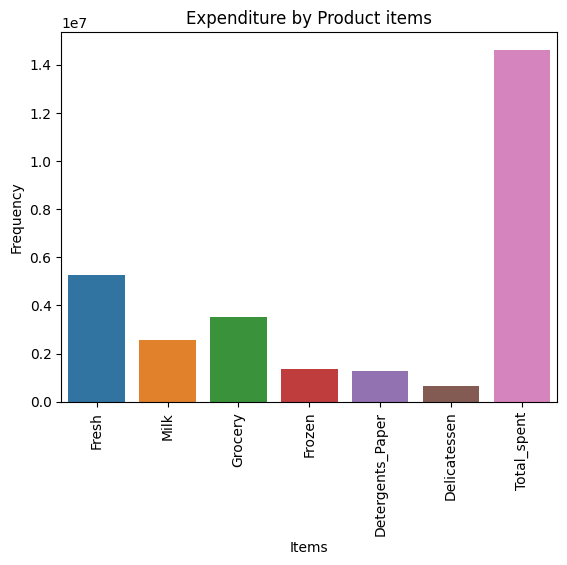

In [12]:
## Frequency of all the products through a barplot
sns.barplot(total_spending)
plt.xticks(rotation=90)
plt.title('Expenditure by Product items')
plt.xlabel('Items')
plt.ylabel('Frequency');


### **Region-wise expenditure**

In [13]:
## Grouping data by Region
region_spend = df.groupby('Region').sum(numeric_only = True)

In [14]:
region_spend

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


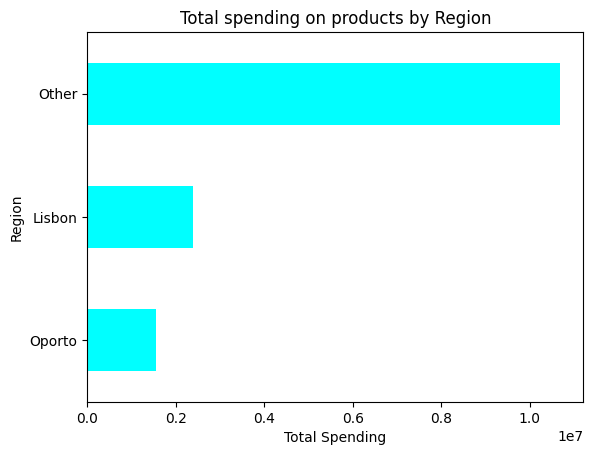

In [15]:
# Sort regions by total spending
region_spend_sorted = region_spend['Total_spent'].sort_values(ascending=True)
region_spend_sorted.plot(kind='barh',color = 'cyan')
plt.xlabel('Total Spending')
plt.title('Total spending on products by Region');

### **Channel-wise Expenditure**

In [16]:
## Grouping data by Channel
channel_spend = df.groupby('Channel').sum(numeric_only = True)
channel_spend

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


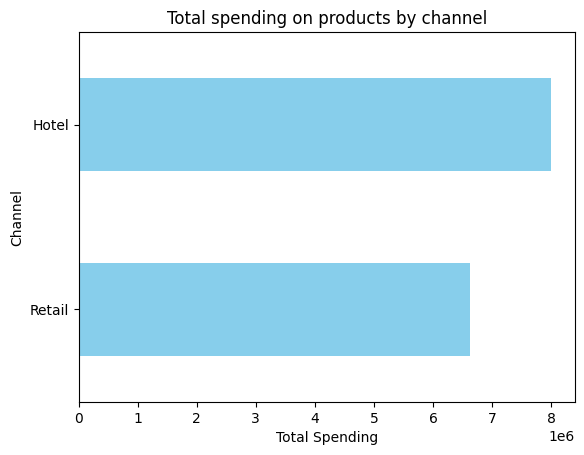

In [17]:
# Sort channels by total spending
channel_spend_sorted= channel_spend['Total_spent'].sort_values(ascending=True)
channel_spend_sorted.plot(kind='barh',color='skyblue')
plt.xlabel('Total Spending')
plt.title('Total spending on products by channel');

## **Product varieties across regions and channels**

In [18]:
## grouping data by region and channel
region_channel = df.groupby(['Region','Channel']).sum(numeric_only = True)
region_channel

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  Total_spent  
Region Channel                             
Lisbon Hotel           70632      1538342  
       Retail          33695       848471  
Oporto Hotel           30965       719150  
       Retail          23541       835938  
Other  Hotel          320358      5742077  
       Retail         191752      4935522

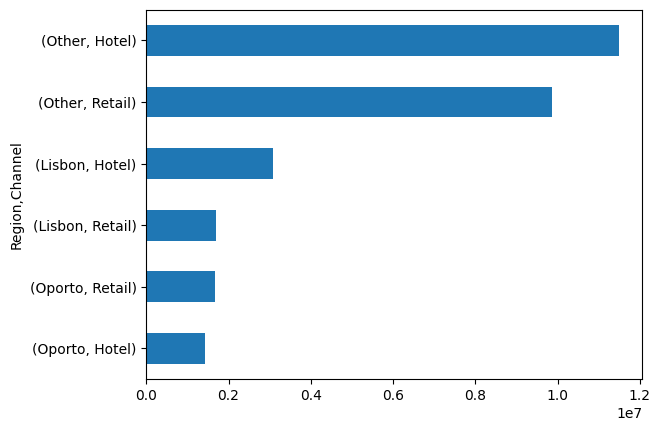

In [19]:
## Visualizing the overall expenditure by regions and channels
region_channel_total = region_channel.sum(axis=1).sort_values(ascending=True)
region_channel_total.plot(kind='barh');

### **Region and Channel that spent the most**

In [20]:
## Extracting the maximum value of total spent column and the associated region and channel with it
region_channel.idxmax()

Fresh                (Other, Hotel)
Milk                (Other, Retail)
Grocery             (Other, Retail)
Frozen               (Other, Hotel)
Detergents_Paper    (Other, Retail)
Delicatessen         (Other, Hotel)
Total_spent          (Other, Hotel)
dtype: object

In [21]:
## Maximum value for total expenditure across regions and channel
max_spending= region_channel.idxmax()
print(f'Region and Channel with most spending:\nRegion:{max_spending.values[-1][0]}\nChannel:{max_spending.values[-1][1]}\nTotal Spending:{region_channel.max().values[-1]}')

Region and Channel with most spending:
Region:Other
Channel:Hotel
Total Spending:5742077


### **Region and Channel that spent the least**

In [22]:
## Extracting the minimum value of total spent column and the associated region and channel with it
region_channel.idxmin()

Fresh               (Lisbon, Retail)
Milk                 (Oporto, Hotel)
Grocery              (Oporto, Hotel)
Frozen              (Oporto, Retail)
Detergents_Paper     (Oporto, Hotel)
Delicatessen        (Oporto, Retail)
Total_spent          (Oporto, Hotel)
dtype: object

In [23]:
## Minimum value for total expenditure across regions and channel
min_spending= region_channel.idxmin()
print(f'Region and Channel with the least spending:\nRegion:{min_spending.values[-1][0]}\nChannel:{min_spending.values[-1][1]}\nTotal Spending:{region_channel.min().values[-1]}')

Region and Channel with the least spending:
Region:Oporto
Channel:Hotel
Total Spending:719150


### **There are 6 different varieties of items that are considered. Description of all the varieties across Region and Channel.**

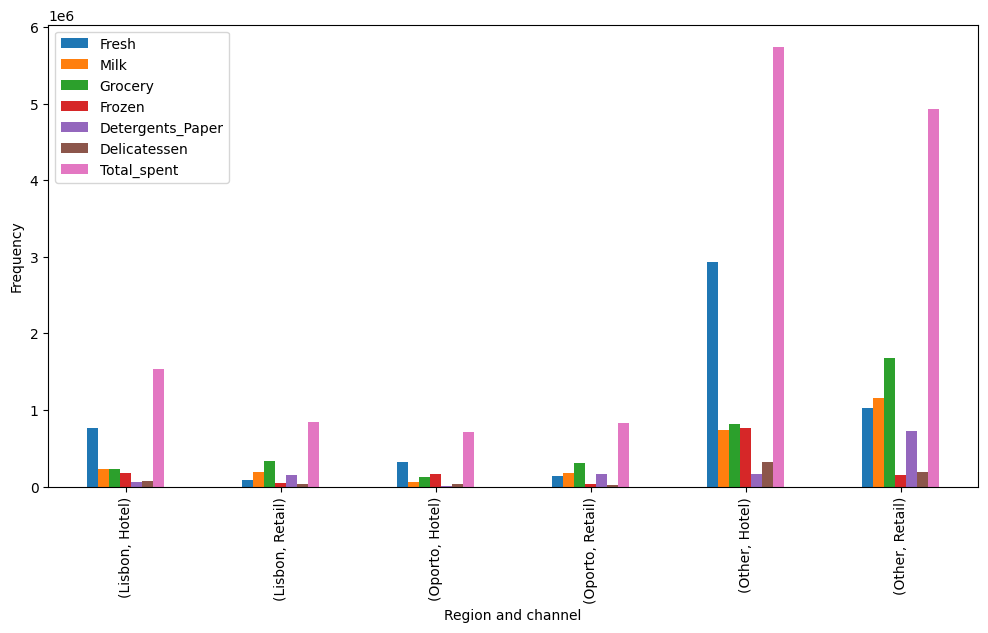

In [24]:
## Visualizing all products across all regions and channel
region_channel.plot(kind='bar',figsize=(12,6))
plt.ylabel('Frequency')
plt.xlabel('Region and channel');

1.	**Fresh:**

•**Lisbon:** Hotels in Lisbon spend the most on fresh items, followed by retail establishments. Similarly, in Oporto and ‘Other’ regions, hotels spend more on fresh items compared to retail establishments.

•	**Oporto:** The spending on fresh items is relatively lower compared to other regions, with hotels spending more than retail establishments.

•	**‘Other’:** Hotels in the ‘Other’ region have the highest spending on fresh items among all regions and channels.

2.	**Milk:**

•	**Lisbon:** Hotels spend more on milk compared to retail establishments in Lisbon. Similarly, in Oporto and ‘Other’ regions, hotels have higher milk expenditures compared to retail establishments.

•	**‘Other’:** Both hotels and retail establishments in the ‘‘Other’’ region have significantly higher spending on milk compared to other regions.

3.	**Grocery:**

•	**Lisbon:** Hotels spend more on groceries compared to retail establishments in Lisbon. A similar trend is observed in Oporto and ‘Other’ regions, where hotels have higher grocery expenditures.

**•	‘Other’:** Both hotels and retail establishments in the ‘Other’ region have substantially higher spending on groceries compared to other regions.

4.	**Frozen:**

•	**Lisbon:** Hotels in Lisbon spend more on frozen items compared to retail establishments. The same trend is observed in Oporto and ‘Other’ regions, with hotels having higher frozen expenditures.

•	**‘Other’:** Both hotels and retail establishments in the ‘Other’ region have significantly higher spending on frozen items compared to other regions.

5.	**Detergents_Paper:**

•	**Lisbon:** Hotels spend more on detergents and paper products compared to retail establishments in Lisbon. Similar patterns are observed in Oporto and ‘Other’ regions, with hotels having higher expenditures.

•	**‘Other’:** Both hotels and retail establishments in the ‘Other’ region have substantially higher spending on detergents and paper products compared to other regions.
6.	**Delicatessen:**
•	**Lisbon:** Hotels spend more on delicatessen items compared to retail establishments in Lisbon. A similar trend is observed in Oporto and ‘Other’ regions, where hotels have higher delicatessen expenditures.

•	**‘Other’:** Both hotels and retail establishments in the ‘Other’ region have significantly higher spending on delicatessen items compared to other regions.

**Justification:**

• There could be a range of factors, including customer preferences, business strategies, demography, and local market dynamics, that impact the variations in spending across different locations and channels.

• Due to the requirement to offer a wide range of services and accommodate customers' preferences, hotels may incur additional costs for specific items.

• To maintain profitable operations and competitive pricing, retail enterprises might concentrate more on economical purchasing tactics.

• Distinctive regional cuisines, nutritional customs, and cultural preferences can also influence consumer buying patterns on various product categories.

•Businesses may better cater their product offers, marketing plans, and inventory management techniques to the varied needs of their customers across various channels and geographies by having a better understanding of these spending patterns.


### **Description of items that show the most and least inconsistent behaviour on the basis of a descriptive measure of variability**

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_spent,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [26]:
means = df[[ 'Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']].mean()

In [27]:
standard_deviations = df[[ 'Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']].std()

In [28]:
## Creating a dataframe for coefficient of variation

coeff_of_variation = (standard_deviations/means)*100
coeff_of_variation_table = pd.DataFrame(coeff_of_variation, columns=['Coefficient of Variation'])
coeff_of_variation_table.sort_values(by = 'Coefficient of Variation',ascending = False)

,Coefficient of Variation
Delicatessen,184.940690
Detergents_Paper,165.464714
Frozen,158.033238
Milk,127.329858
Grocery,119.517437
Fresh,105.391792


We can use the coefficient of variation (CV) as a descriptive measure of variability to find the most and least inconsistent behaviour. The ratio of the standard deviation to the mean, stated as a percentage, is used to determine the coefficient of variation. More variability in relation to the mean is indicated by a higher CV, whilst less variability is indicated by a lower CV.

Least Coefficient of Variation, least inconsistent : Fresh

Most Coefficient of Variation, most inconsistent : Delicatessen

•	This indicates that spending on **fresh items (Fresh)** shows the **least variability** relative to its mean expenditure across different regions and channels, while spending on delicatessen items **(Delicatessen)** exhibits the **highest variability** relative to its mean expenditure.

•	Understanding these differences in spending patterns can assist the company in managing its inventory, setting prices, and allocating resources in an educated manner. For example, the distributor might concentrate on keeping a stable supply chain for these products because spending on fresh goods is generally constant. Conversely, delicatessen products exhibit greater variability, thus the distributor might need to modify ordering procedures and stock levels to better manage demand swings.


### **Identifying any outliers in the data**

Outliers, identified through methods such as boxplots, are data points that deviate significantly from the rest of the dataset. Outliers may indicate errors in data collection, natural variation, or unusual events. Understanding outliers helps in identifying potential data anomalies and assessing their impact on statistical analyses.

To identify outliers in the data, we can use a boxplot, which visually displays the distribution of each variable and highlights any data points that fall significantly outside the typical range.

In the boxplot:

•	The centre 50% of the data are contained in the interquartile range (IQR), which is represented by the box.

•	The data's median, or 50th percentile, is indicated by the line inside the box.

•	Within 1.5 times the IQR from the first and third quartiles, respectively, are where the whiskers spread from the minimum and maximum values. Plotting of individual data points is reserved for outliers, or any data points that extend past the whiskers.


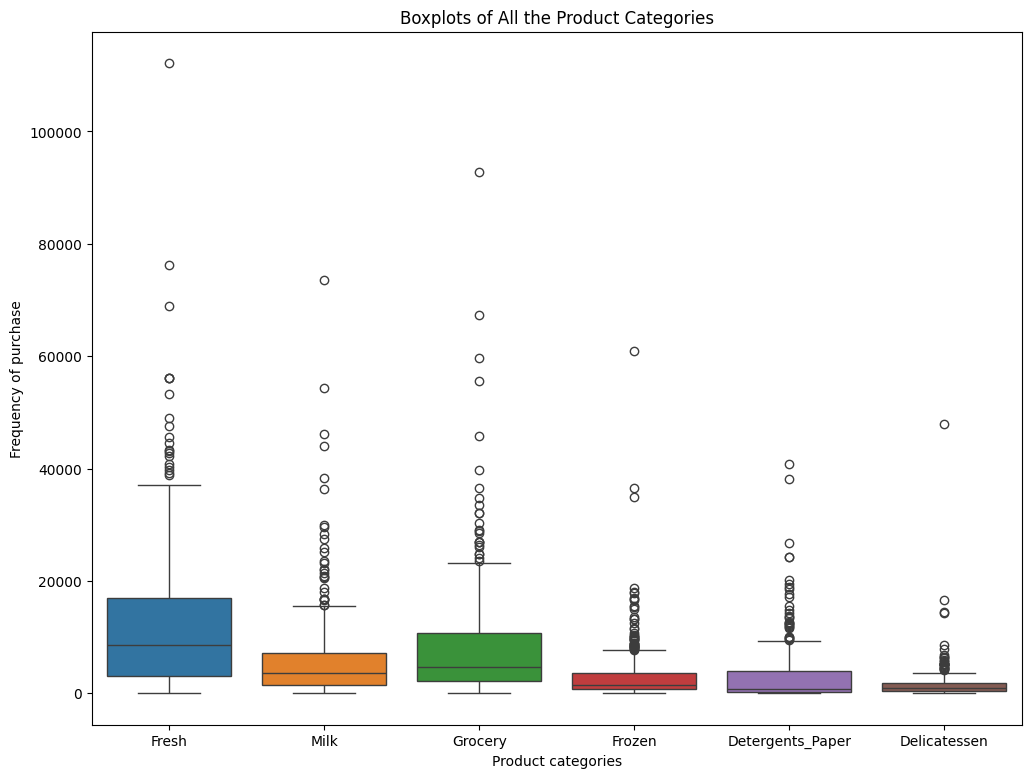

In [29]:
## Using boxplots we can identify outliers
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
plt.figure(figsize = (12,9))
sns.boxplot(df[features])
plt.title('Boxplots of All the Product Categories')
plt.xlabel('Product categories')
plt.ylabel('Frequency of purchase');

**"Fresh" and "Grocery"** had the **most spread** out outliers, way beyond the upper fence of the distributions.

**"Delicatessen" and "Detergents_Paper"** had the **least spread** out outliers as compared to the other products.

The above boxplot shows all the products and the information about the distribution of their data points. The little circles beyond the upper whiskers represent the outliers.

•	The maximum outlier value is in the ‘Fresh’ item going beyond 100000.
This indicates unusual spending patterns in this product category.

•	Similarly, ‘Grocery’ comes next and then ‘Milk’.

•	‘Detergents_paper’ and ‘Delicatessen’ have lesser spread-out outliers. This indicates usually there might be some outliers in this category but they are not as much far away as compared to the other categories.


### **Recommendations for the business and how can our analysis help the business to solve its problem**

The above analysis can provide important insights about the spending patterns followed by different products across different regions and channels. The statistics that we drew earlier will guide us through to understand the kind of planning and strategic decisions the wholesaler needs to make to run a profitable business. Below mentioned are some observations from our analysis:

**1.	Inventory management**

•	Inventory management is the most important operation of any business entity. The wholesaler in our case has many products across many regions and channels and the descriptive statistics and coefficient of variation can help them understand which products to keep ready for supplies at all times, for example, the fresh products have the highest share of customers followed by grocery and milk.

•	Hence, optimize inventory levels to ensure adequate stock of high-demand items while minimizing excess inventory of low-demand items.

**2.	Operational Efficiency**
•	Streamline operations by optimizing transportation and connectivity to high demand regions as in our analysis we found that the ‘Other’ region had the most expenditure on products.

•	Optimal warehouse layout and quick order processing on the basis of regional demand should be an area of focus.

**3.	Cost Control and Pricing Strategies**

•	Look at spending patterns to identify areas where purchasing in bulk or negotiating favourable supplier contracts can result in cost savings.

•	Use dynamic pricing strategies based on shifts in demand to boost profitability. Outlier analysis sheds light on consumer preferences and willingness to pay for particular goods. The company can remain competitive in the market by modifying its price methods to attract value from clients with large spending budgets.

**4.	Marketing strategies and customer relationship**

•	Tailor marketing strategies on the basis of expenditure patterns from across regions and channels. Use insights from spending data to enhance customer segmentation and develop personalized offerings and services.

•	Develop promotional campaigns targeted towards specific requirements and preferences of customers in each segment and channel.

•	Hotels are a huge chunk of purchasers and have different requirements than retailors so build marketing campaigns to attract more hotels understanding their demand patterns.

**5.	Monitoring and control**

•	Analyse expenditure patterns and KPIs on a regular basis to assess how well policies are working.

•	Recognise potential hazards and weak points in the supply chain, such as changes in commodity pricing or transportation interruptions.

•	Create backup plans to reduce risks and guarantee company operations in case of unanticipated events.

The wholesale distributor may boost customer satisfaction, increase growth, and improve operational efficiency by utilising insights from the analysis of expenditure data to make well-informed decisions and strategic investments. Understanding demand patterns and spending behaviours observed in different products can help in making inventory and marketing decisions. The entity can remain competitive in the sector and adjust to shifting market conditions by using a data-driven approach.
